In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline


def color_thresh(img, rgb_thresh=(0, 0, 0)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select
    
# Define color selection criteria

red_threshold = 160  #this variable adjusts the threshold value used for comparison
green_threshold = 160  #this variable adjusts the threshold value used for comparison
blue_threshold = 160  #this variable adjusts the threshold value used for comparison
rgb_threshold = (red_threshold, green_threshold, blue_threshold)  #combines the three variables into a 1x3 array

image1 = mpimg.imread('example-grid1.jpg')

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

#dst_size adds pixels to the centerline value that forms a set of square coordinates when combined with bottom offset
dst_size = 7
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 5
source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image1.shape[1]/2 - dst_size, image1.shape[0] - bottom_offset],
                  [image1.shape[1]/2 + dst_size, image1.shape[0] - bottom_offset],
                  [image1.shape[1]/2 + dst_size, image1.shape[0] - 2*dst_size - bottom_offset], 
                  [image1.shape[1]/2 - dst_size, image1.shape[0] - 2*dst_size - bottom_offset],
                  ])










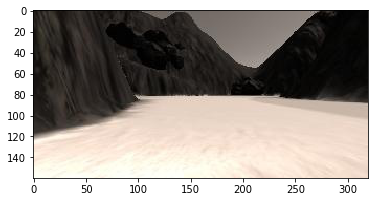

[166 166 165 ..., 164 165 166]
[ 19  20  21 ..., 156 156 156]


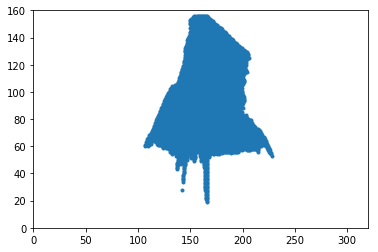

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image = mpimg.imread('pratImage.jpg')
plt.imshow(image)
plt.show()

warped = perspect_transform(image, source, destination)
colorsel = color_thresh(warped, rgb_thresh=(150,150,150))

#plt.imshow(warped, cmap='gray')
#plt.show()
#plt.imshow(colorsel, cmap='gray')
#plt.show()

ypos, xpos  = colorsel.nonzero()  #looks for the nonzero values and places them in the variables xpos and ypos
print(xpos)  #prints the xpos variable
print(ypos)  #prints the ypos variable
plt.plot(xpos, ypos, '.')  #plot the xpos and ypos
plt.xlim(0,320)  #axis on which to plot limits for the x dimension
plt.ylim(0,160)  #axis on which to plot limits for the y dimension
plt.show()  #shows the picture.





In [52]:
def rover_coords(binary_img):
    ypos, xpos  = binary_img.nonzero()  #looks for the nonzero values and places them in the variables xpos and ypos
    xpixel = -(ypos-binary_img.shape[0]).astype(np.float)
    ypixel = -(xpos-binary_img.shape[1]/2).astype(np.float)
    return xpixel, ypixel

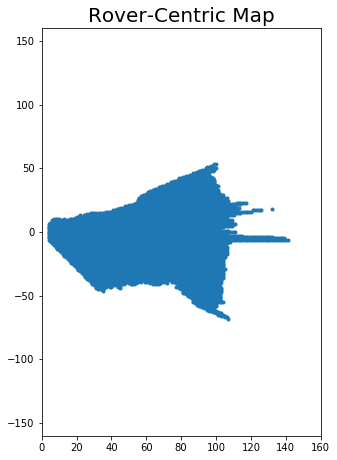

In [53]:
xpix, ypix = rover_coords(colorsel)
fig = plt.figure(figsize=(5, 7.5))
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)
#plt.show() # Uncomment if running on your local machine